<a href="https://colab.research.google.com/github/jnoms/SV40_transcriptome/blob/main/bin/colab/Figure6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Import data

In [1]:
%%capture

! wget https://zenodo.org/record/5593507/files/2021-10-22_PyV_transcriptome.zip?download=1
! unzip 2021-10-22_PyV_transcriptome.zip?download=1
! mkdir data
! mv 2021-10-22_PyV_transcriptome/processed_data data/inputs
! cp 2021-10-22_PyV_transcriptome/code/R/UTILS* data

## Set up enviornment

In [2]:
%load_ext rpy2.ipython


In [3]:
%%capture
%%R 

install.packages("plyr")
install.packages("tidyverse")
install.packages("scales")
install.packages("patchwork")
install.packages("gggenes")
install.packages("reshape2")
install.packages("hash")
install.packages("ggridges")
install.packages("UpSetR")

In [4]:
%%capture
%%R 

library("plyr")
library("tidyverse")
library("scales")
library("patchwork")
library("gggenes")
library("reshape2")
library("hash")
library("ggridges")
library("UpSetR")

COLAB CONSTANTS

In [5]:
%%R


PREFIX <- "data"

## Import functions and constants

In [6]:
%%R

functions_path <- paste(PREFIX, "UTILS_functions.R", sep="/")
source(functions_path)


Script constants

In [7]:
%%R

#-----------------------------------------------------------------------------------------------#
# Constants
#-----------------------------------------------------------------------------------------------#

# Old color scheme
# virus_gene_fill = c("Agnoprotein" = "#177e89",
#                     "VP1" = "#82C0CC",
#                     "VP2" = "#db3a34",
#                     "VP3" = "#ffc857",
#                     "ST" = "#ff7d00",
#                     "LT" = "#1A936F",
#                     "MT" = "#9c6644",
#                     
#                     # BSPyV1
#                     "Cygno" = "#fb8b24",
#                     "VP1e"  = "#9a031e")

# Pallete: https://gka.github.io/palettes/#/9|d|00429d,96ffea,ffffe0|ffffe0,ff005e,93003a|1|1
virus_gene_fill = c("Agnoprotein" = "#00429d",
                    "VP1" = "#4771b2",
                    "VP2" = "#a5d5d8",
                    "VP3" = "#73a2c6",
                    "ST" = "#f4777f",
                    "LT" = "#93003a",
                    "MT" = "#9c6644")
                    
                    # BSPyV1
                    #"Cygno" = "#fb8b24",
                    #"VP1e"  = "#9a031e"

span_colors <- c("exon" = '#e63946',
                 "intron" = "#FFDDD6")

virus_specific_colors <- c(
  "SV40" = "#006d77",
  "BKPyV (Dunlop)" = "#3d5a80",
  "BKPyV (Dik)" = "#98c1d9",
  "JCPyV" = "#ee6c4d",
  "MPyV" = "#772e25",
  "MCPyVSyn" = "#EE4266", 
  "MCPyV" = "#EE4266", 
  "HPyV7" = "#000000",
  "BSPyV1" = "#90be6d"
)

virus_order <- c("SV40", "BKPyV (Dunlop)", "BKPyV (Dik)", "MPyV", "JCPyV", "MCPyVSyn", "MCPyV", "HPyV7", "BSPyV1")


genome_lengths <- genome_lengths <- c("SV40" = 5243, "BKPyV" = 5153, "JCPyV" = 5130, "MPyV" = 5307, "MCPyV"=5387, "HPyV7"=4952, "BSPyV1"=5421)


strand_colors = c("+" = "#0f4c5c", "-" = "#9a031e")

technology_colors <- c("dRNAseq" = "#BA8CA4",
                       "SMRTseq" = "#f2cc8f",
                       "Illumina" = "#8DA1B9")

#-----------------------------------------------------------------------------------------------#
# gggenes
#-----------------------------------------------------------------------------------------------#

# GGGENES - SV40
#----------------------------------------------#
# SINGLE
sv40_genes <- tibble(
  molecule = "SV40",
  gene = c("Agnoprotein", "VP1", "VP2", "VP3", "ST", "LT", "LT" ),
  start = c(235, 1399, 462, 816, 4539, 2591, 4818),
  end = c(423, 2493, 1520, 1520, 5063, 4471, 5063),
  strand = c("forward", "forward", "forward", "forward", "reverse", "reverse", "reverse"),
  direction = c(1, 1, 1, 1, -1, -1, -1),
  exon = c(1, 1, 1, 1, 1, 1, 2)
)

# Order for plotting
sv40_genes$gene <- factor(sv40_genes$gene, levels=c("Agnoprotein", "VP1", "VP2", "VP3", "ST", "LT"), ordered = T)


# DOUBLE
sv40_genes_x2 <- rbind(
  sv40_genes %>% mutate(copy = 1),
  sv40_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 5243)) %>%
  mutate(end = end + ((copy -1) * 5243))

# Ten!
sv40_genes_x10 <- rbind(
  sv40_genes %>% mutate(copy = 1),
  sv40_genes %>% mutate(copy = 2),
  sv40_genes %>% mutate(copy = 3),
  sv40_genes %>% mutate(copy = 4),
  sv40_genes %>% mutate(copy = 5),
  sv40_genes %>% mutate(copy = 6),
  sv40_genes %>% mutate(copy = 7),
  sv40_genes %>% mutate(copy = 8),
  sv40_genes %>% mutate(copy = 9),
  sv40_genes %>% mutate(copy = 10)
) %>%
  mutate(start = start + ((copy -1) * 5243)) %>%
  mutate(end = end + ((copy -1) * 5243))

sv40_genes_x20 <- rbind(
  sv40_genes %>% mutate(copy = 1),
  sv40_genes %>% mutate(copy = 2),
  sv40_genes %>% mutate(copy = 3),
  sv40_genes %>% mutate(copy = 4),
  sv40_genes %>% mutate(copy = 5),
  sv40_genes %>% mutate(copy = 6),
  sv40_genes %>% mutate(copy = 7),
  sv40_genes %>% mutate(copy = 8),
  sv40_genes %>% mutate(copy = 9),
  sv40_genes %>% mutate(copy = 10),
  sv40_genes %>% mutate(copy = 11),
  sv40_genes %>% mutate(copy = 12),
  sv40_genes %>% mutate(copy = 13),
  sv40_genes %>% mutate(copy = 14),
  sv40_genes %>% mutate(copy = 15),
  sv40_genes %>% mutate(copy = 16),
  sv40_genes %>% mutate(copy = 17),
  sv40_genes %>% mutate(copy = 18),
  sv40_genes %>% mutate(copy = 19),
  sv40_genes %>% mutate(copy = 20)
) %>%
  mutate(start = start + ((copy -1) * 5243)) %>%
  mutate(end = end + ((copy -1) * 5243))
#----------------------------------------------#


# GGGENES - BK
#----------------------------------------------#
# GENOME LEN IS 5153

# SINGLE
bk_genes <- tibble(
  molecule = "BK",
  gene = c("Agnoprotein", "VP2", "VP3", "VP1","ST","LT", "LT"),
  start = c(388, 624, 981, 1564, 4635, 2722, 4911),
  end = c(588, 1679, 1679, 2652, 5153, 4566, 5153),
  strand = c("forward", "forward", "forward", "forward", "reverse", "reverse", "reverse"),
  direction = c(1, 1, 1, 1, -1, -1, -1),
  exon = c(1, 1, 1, 1, 1, 1, 2)
)

# Order for plotting
bk_genes$gene <- factor(bk_genes$gene, levels=c("Agnoprotein", "VP1", "VP2", "VP3", "ST", "LT"), ordered = T)


# double
bk_genes_x2 <- rbind(
  bk_genes %>% mutate(copy = 1),
  bk_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 5153)) %>%
  mutate(end = end + ((copy -1) * 5153))


# ten
bk_genes_x10 <- rbind(
  bk_genes %>% mutate(copy = 1),
  bk_genes %>% mutate(copy = 2),
  bk_genes %>% mutate(copy = 3),
  bk_genes %>% mutate(copy = 4),
  bk_genes %>% mutate(copy = 5),
  bk_genes %>% mutate(copy = 6),
  bk_genes %>% mutate(copy = 7),
  bk_genes %>% mutate(copy = 8),
  bk_genes %>% mutate(copy = 9),
  bk_genes %>% mutate(copy = 10)
) %>%
  mutate(start = start + ((copy -1) * 5153)) %>%
  mutate(end = end + ((copy -1) * 5153))

bk_genes_x20 <- rbind(
  bk_genes %>% mutate(copy = 1),
  bk_genes %>% mutate(copy = 2),
  bk_genes %>% mutate(copy = 3),
  bk_genes %>% mutate(copy = 4),
  bk_genes %>% mutate(copy = 5),
  bk_genes %>% mutate(copy = 6),
  bk_genes %>% mutate(copy = 7),
  bk_genes %>% mutate(copy = 8),
  bk_genes %>% mutate(copy = 9),
  bk_genes %>% mutate(copy = 10),
  bk_genes %>% mutate(copy = 11),
  bk_genes %>% mutate(copy = 12),
  bk_genes %>% mutate(copy = 13),
  bk_genes %>% mutate(copy = 14),
  bk_genes %>% mutate(copy = 15),
  bk_genes %>% mutate(copy = 16),
  bk_genes %>% mutate(copy = 17),
  bk_genes %>% mutate(copy = 18),
  bk_genes %>% mutate(copy = 19),
  bk_genes %>% mutate(copy = 20)
) %>%
  mutate(start = start + ((copy -1) * 5153)) %>%
  mutate(end = end + ((copy -1) * 5153))
#----------------------------------------------#

# gggenes - MPyV
#----------------------------------------------#
# GENOME LENGTH IS 5307

# SINGLE
MPyV_genes <- tibble(
  molecule = "MPyV",
  gene = c("LT", "LT", "MT", "MT", "ST", "ST", "VP1", "VP2", "VP3"),
  end = c(175, 797, 175, 811, 175, 794, 2932, 4055, 4055),
  start = c(411, 2908, 748, 1502, 748, 810, 4086, 5014, 4669),
  strand = c("reverse", "reverse", "reverse", "reverse", "reverse", "reverse", "forward", "forward", "forward"),
  direction = c(-1, -1, -1, -1, -1, -1, 1, 1, 1),
  exon = c(2, 1, 1, 1, 1, 1, 1, 1, 1)
) 

# NOTE - I reverse complemented the reference genome. Above, I am marking the NEW/ADJUSTED strand/direction, but the OLD coordinates. To correct the coordinates, will subtract them all from genome length below. I also inverted the start/end above, so they end up the correct orientation after adjustment:
MPyV_genes <- MPyV_genes %>%
  mutate(start = 5307 - start) %>%
  mutate(end = 5307 - end) %>%
  arrange(start)

# Order for plotting
MPyV_genes$gene <- factor(MPyV_genes$gene, levels=c("VP2", "VP3", "VP1", "ST", "LT", "MT"), ordered = T)


# DOUBLE
MPyV_genes_x2 <- rbind(
  MPyV_genes %>% mutate(copy = 1),
  MPyV_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 5307)) %>%
  mutate(end = end + ((copy -1) * 5307))


# 20x
MPyV_genes_x20 <- rbind(
  MPyV_genes %>% mutate(copy = 1),
  MPyV_genes %>% mutate(copy = 2),
  MPyV_genes %>% mutate(copy = 3),
  MPyV_genes %>% mutate(copy = 4),
  MPyV_genes %>% mutate(copy = 5),
  MPyV_genes %>% mutate(copy = 6),
  MPyV_genes %>% mutate(copy = 7),
  MPyV_genes %>% mutate(copy = 8),
  MPyV_genes %>% mutate(copy = 9),
  MPyV_genes %>% mutate(copy = 10),
  MPyV_genes %>% mutate(copy = 11),
  MPyV_genes %>% mutate(copy = 12),
  MPyV_genes %>% mutate(copy = 13),
  MPyV_genes %>% mutate(copy = 14),
  MPyV_genes %>% mutate(copy = 15),
  MPyV_genes %>% mutate(copy = 16),
  MPyV_genes %>% mutate(copy = 17),
  MPyV_genes %>% mutate(copy = 18),
  MPyV_genes %>% mutate(copy = 19),
  MPyV_genes %>% mutate(copy = 20)
) %>%
  mutate(start = start + ((copy -1) * 5307)) %>%
  mutate(end = end + ((copy -1) * 5307))
#----------------------------------------------#



# gggenes - JC
#----------------------------------------------#
# GENOME LEN IS 5130

# SINGLE
jc_genes <- tibble(
  molecule = "JC",
  gene = c("Agnoprotein", "VP2", "VP3", "VP1","ST","LT", "LT"),
  start = c(277, 526, 883, 1469, 4495, 2603, 4771),
  end = c(492, 1560, 1560, 2533, 5013, 4426, 5013),
  strand = c("forward", "forward", "forward", "forward", "reverse", "reverse", "reverse"),
  direction = c(1, 1, 1, 1, -1, -1, -1),
  exon = c(1, 1, 1, 1, 1, 1, 2)
)


# Order for plotting
jc_genes$gene <- factor(jc_genes$gene, levels=c("Agnoprotein", "VP1", "VP2", "VP3", "ST", "LT"), ordered = T)


# DOUBLE
jc_genes_x2 <- rbind(
  jc_genes %>% mutate(copy = 1),
  jc_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 5130)) %>%
  mutate(end = end + ((copy -1) * 5130))
#----------------------------------------------#


# gggenes - MCPyV
#----------------------------------------------#
# GENOME LEN IS 5387

# SINGLE
MCPyV_genes <- tibble(
  molecule = "MCPyV",
  gene = c("VP2", "VP1","ST","LT", "LT"),
  start = c(465, 1156, 4827, 2503, 5154),
  end = c(1190, 2427, 5387, 4722, 5387),
  strand = c("forward", "forward", "reverse", "reverse", "reverse"),
  direction = c(1, 1, -1, -1, -1),
  exon = c(1, 1, 1, 1, 2)
)


# Order for plotting
MCPyV_genes$gene <- factor(MCPyV_genes$gene, levels=c("Agnoprotein", "VP1", "VP2", "VP3", "ST", "LT"), ordered = T)


# DOUBLE
MCPyV_genes_x2 <- rbind(
  MCPyV_genes %>% mutate(copy = 1),
  MCPyV_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 5387)) %>%
  mutate(end = end + ((copy -1) * 5387))
#----------------------------------------------#


# gggenes - HPyV7
#----------------------------------------------#
# GENOME LEN IS 4952

# SINGLE
HPyV7_genes <- tibble(
  molecule = "MCPyV",
  gene = c("VP2", "VP3", "VP1","ST","LT", "LT"),
  start = c(386, 746, 1305, 4371, 2532, 4707),
  end = c(1375, 1375, 2447, 4952, 4301, 4952),
  strand = c("forward", "forward", "forward", "reverse", "reverse", "reverse"),
  direction = c(1, 1, 1, -1, -1, -1),
  exon = c(1, 1, 1, 1, 1, 2)
)


# Order for plotting
HPyV7_genes$gene <- factor(HPyV7_genes$gene, levels=c("Agnoprotein", "VP1", "VP2", "VP3", "ST", "LT"), ordered = T)


# DOUBLE
HPyV7_genes_x2 <- rbind(
  HPyV7_genes %>% mutate(copy = 1),
  HPyV7_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 4952)) %>%
  mutate(end = end + ((copy -1) * 4952))
#----------------------------------------------#


# gggenes - BSPyV1
#----------------------------------------------#
# GENOME LEN IS 5421

# SINGLE
BSPyV1_genes <- tibble(
  molecule = "MCPyV",
  gene = c("Cygno", "VP2", "VP1", "VP1","VP1","VP1e", "LT", "LT"),
  start = c(387, 664,  1199,  1559, 2463,  3116,   3570, 5374  ),
  end =  c(725, 1263,  1406,  2421, 3047,  3562,   5192, 5421 ),
  strand = c("forward", "forward", "forward", "forward", "forward", "forward", "reverse", "reverse"),
  direction = c(1, 1, 1, 1, 1, 1, -1, -1),
  exon = c(1, 1, 1, 1, 1, 1, 1, 2)
)


# Order for plotting
BSPyV1_genes$gene <- factor(BSPyV1_genes$gene, levels=c("Cygno", "VP1", "VP2", "VP1e", "LT"), ordered = T)


# DOUBLE
BSPyV1_genes_x2 <- rbind(
  BSPyV1_genes %>% mutate(copy = 1),
  BSPyV1_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 5421)) %>%
  mutate(end = end + ((copy -1) * 5421))

#----------------------------------------------#




## Import data

In [8]:
%%R

# BK
#---------------------------#

# Samples of interest
BKT_07 <- read_delim(paste(PREFIX, "inputs/BKPyV/illumina/Starrett_BK_tumors/07_CB36_S7_spans.txt", sep="/"), delim="\t") %>%
  format_dRNAseq_inputs()
BKT_08 <- read_delim(paste(PREFIX, "inputs/BKPyV/illumina/Starrett_BK_tumors/08_CB37_S8_spans.txt", sep="/"), delim="\t") %>%
  format_dRNAseq_inputs()

# Collapse em
BKT_07 <- BKT_07 %>%
  collapse_tx_classes() %>%
  mutate(sample = "BKT_07")
BKT_08 <- BKT_08 %>%
  collapse_tx_classes() %>%
  mutate(sample = "BKT_08")


# MCC
#---------------------------#
# Get paths, and name them as the sample
MCC_paths <- list.files(paste(PREFIX, "inputs/MCPyV/MCC_tumor/spans", sep="/"), full.names = T)
names(MCC_paths) <- list.files(paste(PREFIX, "inputs/MCPyV/MCC_tumor/spans", sep="/")) %>% str_replace_all("_spans.txt", "")


# Load them into an aggregated/collapsed dataframe.
MCC_spans <- tibble()
for (sample_name in names(MCC_paths)) {
    print(sample_name)
    path = MCC_paths[[sample_name]]
    
    d <- read_delim(path, delim="\t") %>%
      format_dRNAseq_inputs %>%
      illumina_filter_out_of_quadrant(genome_lengths["MCPyV"]) %>%
      collapse_tx_classes %>%
      mutate(sample = sample_name)
    
    MCC_spans <- MCC_spans %>%
      rbind(d)
}


# Isolate those that have superT
MCC_superT_sample_list <- MCC_spans %>%
  filter(start == 9347) %>%
  arrange(-tx_class_proportion) %>%
  pull(sample) %>%
  unique()

MCC_spans_superT <- MCC_spans %>%
  filter(sample %in% MCC_superT_sample_list)


Rows: 471 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): name, strand, span_type
dbl (6): start, end, tx_start, tx_end, tx_class, tx_class_count
lgl (1): tx_class_illumina_support

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 513 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): name, strand, span_type
dbl (6): start, end, tx_start, tx_end, tx_class, tx_class_count
lgl (1): tx_class_illumina_support

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
[1] "J1_w168"
Rows: 6868 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): name, strand, span_type
dbl (6): start, end, 

# Analysis and plotting

Heatmap

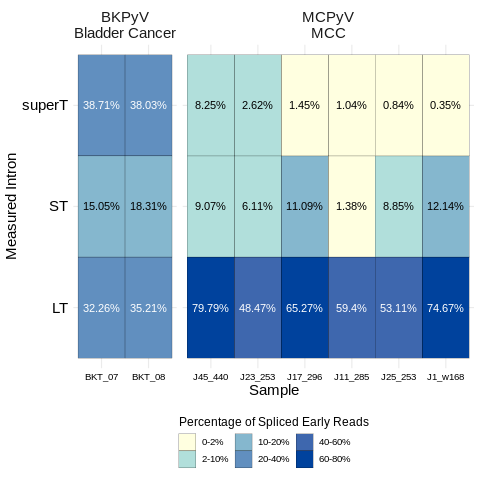

In [9]:
%%R
# Label ST, LT, superT...

MCC_ST_LT_superT <- MCC_spans_superT %>%
  mutate(ID = ifelse(
    start == 5153 & end == 4722,
    "LT",
    "")
    ) %>%
  mutate(ID = ifelse(
    start == 4807 & end == 4722,
    "ST",
    ID)
    ) %>%
  mutate(ID = ifelse(
    start == 9347 & end == 4722,
    "superT",
    ID)
    ) %>%
  filter(ID != "") %>%
  filter(!(sample == "J1_w168" & tx_class == 45))


BKT_ST_LT_superT <- rbind(BKT_07, BKT_08) %>%
  filter(strand == "-") %>%
  mutate(ID = ifelse(
    start == 9563 & end == 4566,
    "superT",
    "")
    ) %>%
  mutate(ID = ifelse(
    start == 4910 & end == 4566,
    "LT",
    ID)
    ) %>%
  mutate(ID = ifelse(
    start == 4633 & end == 4566,
    "ST",
    ID)
    ) %>%
  filter( ID != "")


# Combine
MCC_BKT <- rbind(
  MCC_ST_LT_superT %>% mutate(virus = "MCPyV\nMCC"),
  BKT_ST_LT_superT %>% mutate(virus = "BKPyV\nBladder Cancer")
)

# Order by amount of superT
sample_order <- MCC_BKT %>%
  filter(ID == "superT") %>%
  arrange(-tx_class_proportion) %>%
  pull(sample)
MCC_BKT <- MCC_BKT %>%
  mutate(sample = factor(sample, ordered=T, levels = sample_order))


# Plot 
MCC_BKT_superT_heatmap_plt <- MCC_BKT %>%
  mutate(percentage_label = round(tx_class_proportion, 2)) %>%
  mutate(percentage_label = paste(percentage_label, "%", sep="")) %>%
  
  # Make discrete scale categories
  mutate(scale_level = ifelse(tx_class_proportion < 2, "0-2%", ""),
         scale_level = ifelse(tx_class_proportion >= 2 & tx_class_proportion < 10, "2-10%", scale_level),
         scale_level = ifelse(tx_class_proportion >= 10 & tx_class_proportion < 20, "10-20%", scale_level),
         scale_level = ifelse(tx_class_proportion >= 20 & tx_class_proportion < 40, "20-40%", scale_level),
         scale_level = ifelse(tx_class_proportion >= 40 & tx_class_proportion < 60, "40-60%", scale_level),
         scale_level = ifelse(tx_class_proportion >= 60 & tx_class_proportion < 80, "60-80%", scale_level)
         ) %>%
  mutate(scale_level = factor(scale_level, ordered = T, levels=c("0-2%", "2-10%", "10-20%", "20-40%", "40-60%", "60-80%"))) %>%
  
  # Font color based on tx_percentage
  mutate(font_color = ifelse(tx_class_proportion > 30, "White", "Black")) %>%
  
  # plot
  
  ggplot() +
  
  # the heatmap
  geom_tile(
    aes(x = sample, y = ID, fill = scale_level),
    color = "black"
  ) +
  
  # Labeled percentage
  geom_text(
    aes(x = sample, y = ID, label = percentage_label, color = font_color),
    show.legend = F
  ) +
  
  # Aesthetics
  facet_grid(~virus, space = "free", scales = "free") +
  theme_minimal(base_size = 12) +
  theme(legend.position = "bottom",
        axis.text.y = element_text(size = 15, color="black"),
        strip.text = element_text(size = 15),
        axis.text.x = element_text(color="black"),
        axis.title = element_text(size = 15)) +
  scale_fill_manual(
    values = c(
      "0-2%" = "#ffffe0",
      "2-10%" = "#b1dfdb",
      "10-20%" = "#85b7ce",
      "20-40%" = "#618fbf",
      "40-60%" = "#3e67ae",
      "60-80%" = "#00429d"
    ),
    name = "Percentage of Spliced Early Reads",
    guide = guide_legend(
      direction = "horizontal",
      title.position = "top"
      )
  ) +
  ylab("Measured Intron") + xlab("Sample") +
  scale_color_manual(values=c("Black" = "Black", "White" = "White"))


  MCC_BKT_superT_heatmap_plt